# Week 3, part 1: Build your own emotion lexicon

Can we use word counts to measure emotion? And can we go beyond simple positive/negative "valence"?

Last week we looked at pre-built sentiment lexicons. Today we will work in groups to define your own lexicons for specific emotions.

[Robert Plutchik](https://en.wikipedia.org/wiki/Robert_Plutchik) defines eight basic [emotions](https://en.wikipedia.org/wiki/Emotion): joy/sadness, anticipation/surprise, trust/disgust, anger/fear.

INSTRUCTIONS:

Work with the other students at your table. You will turn in a single report to CMS. All students in a group will get the same grade, so make sure everyone participates.

1. Create a shared spreadsheet doc, such as Google sheets. You can download these files in CSV format from the File / Download / ... menu option. Create a second shared document to record your notes.

1. Create a group in CMS

1. I've added a new optional argument to `score_counts` and `load_paragraphs`: `extra_words`. Discuss what this option does, and try a few different numbers using the default lexicon (`bingliu`) and novel (`christmas`). In your document, describe your findings.

1. Choose an emotion or opposed pair of emotions. Plutchik's are a good start, but feel free to try others.

1. Brainstorm words that you think indicate this emotion. Put numeric weights in the first column and words in the second column, as we did for the file `bingliu.csv`.

1. Download your lexicon, and change the filename for `load_word_weights` to that filename. Save this file as "Version 1", and keep a copy of it.

1. Apply the lexicon to Dickens novels. Each student should choose one of the files in the `dickens` directory. Change the filename passed to `load_paragraphs` appropriately.

1. Discuss your results. Compare top- and bottom- scoring paragraphs in the different novels. Look at the raw and "rolling mean" time series. Find passages that score high and low in these time series and look at the context around those paragraphs. In your document, copy in example paragraphs and comment on whether they are correct or not correct, and why. Each student should contribute, put your name on your exma

1. Based on the results of your initial lexicon, create "Version 2" of your spreadsheet. Add or remove words, and change weights as necessary.

1. Save this Version 2 lexicon as a CSV, and repeat the previous exploration. Document all of your findings in the shared document.

1. Reflection. We will compare and discuss results in class. After that, write responses to the following in your document. Does your lexicon work? Was this process difficult? What factors made it easy or hard? Was your emotion easier or harder than others? If any other group worked on the same emotion, did they get similar results?

1. Upload a zip file containing your written document and CSV copies of all versions of your sentiment lexicon files to CMS. Each member will need to join the CMS group to receive credit.


In [1]:
import re, sys
from collections import Counter
from matplotlib import pyplot
import numpy, pandas
from IPython.display import display, Markdown

IDEAS FOR YOUR WRITING RESPONSE FOR FRIDAY:

 Both groups are working from Vonnegut's description of plot. Does this
  view really reflect plot? If not, what is missing, and how important is it
  to you?

 Given your experience with lexicon-based sentiment analysis, how well does
  it approximate a quantity that's relevant for plot analysis?

 Would a more nuanced view of emotion lead to a better representation of plot?

In [2]:
def load_word_weights(lexicon_file):

    ## Create a mapping from words to numbers
    word_weights = {}
    with open(lexicon_file) as lexicon_reader:
        for line in lexicon_reader:
            weight, word = line.rstrip().split(",") ## split on comma
            word_weights[word] = float(weight) ## convert string to number
    
    return word_weights

In [3]:
## This function applies the word weights to a list of word counts
def score_counts(counter, word_weights, extra_words = 0):
    ## accumulate word weights in this variable
    score = 0
    
    ## count the words in the passage
    total_tokens = sum(counter.values())
    ## check for empty segments
    if total_tokens == 0:
        return 0
    
    ## for each word, look up its score
    for word in counter.keys():
        if word in word_weights:
            score += word_weights[word] * counter[word]
    return score / (total_tokens + extra_words)

In [4]:
def load_paragraphs(text_file, extra_words = 0):

    ## Here's an example of a simple pattern defining a word token. 
    word_pattern = re.compile("\w[\w\-\']*\w|\w") ## what matches this?

    ## Now look at the actual documents. We'll create a list with one object per text segment.
    paragraphs = []
    
    ## here's where we actually read the file
    with open(text_file, encoding="utf-8") as file:
    
        ## This block reads a file line by line.
        for line in file:
            line = line.rstrip()
        
            tokens = word_pattern.findall(line)
        
            ## turn a list into a word->count map
            paragraph_counts = Counter(tokens)
        
            ## create the paragraph object, with the original text, 
            ##  the word counts, and the total score.
            paragraphs.append({'text': line, 'counts': paragraph_counts,
                               'score': score_counts(paragraph_counts, word_weights, extra_words) })

    return paragraphs

In [23]:
### MODIFY THESE TWO FILENAMES

word_weights = load_word_weights("bingliu.txt")
paragraphs = load_paragraphs("../texts/literature/The-House-on-Mango-Street-No-Blank-Lines.txt")

In [24]:
sorted_paragraphs = sorted(paragraphs, key=lambda x: x["score"])

## Display the 10 most negative
for paragraph in sorted_paragraphs[0:9]:
    print("{}\t{}".format(paragraph['score'], paragraph['text']))

## ... and the 10 most positive
for paragraph in sorted_paragraphs[-10:-1]:
    print("{}\t{}".format(paragraph['score'], paragraph['text']))

-0.4	Who you calling ugly, ugly?
-0.3333333333333333	Whose fat face?
-0.3333333333333333	That’s stupid.
-0.3333333333333333	Who’s stupid?
-0.3	My knees hurt, the one with the funny laugh complained.
-0.25	and break your lip.
-0.2	Your ugly mama’s toes.
-0.2	I’ll shake the sky
-0.16666666666666666	Ay, she says, she is sad.
0.16666666666666666	Some are baggy like soggy Band-Aids
0.16666666666666666	like the waves on the sea,
0.16666666666666666	like the clouds in the wind,
0.18181818181818182	Cumulus are cute, Rachel says. She would say something like that.
0.2	… like bare feet in September!
0.2	Do you like these shoes?
0.2222222222222222	I like the boys and the boys like me.
0.25	like a hundred violins.
0.3333333333333333	I like coffee, I like tea.


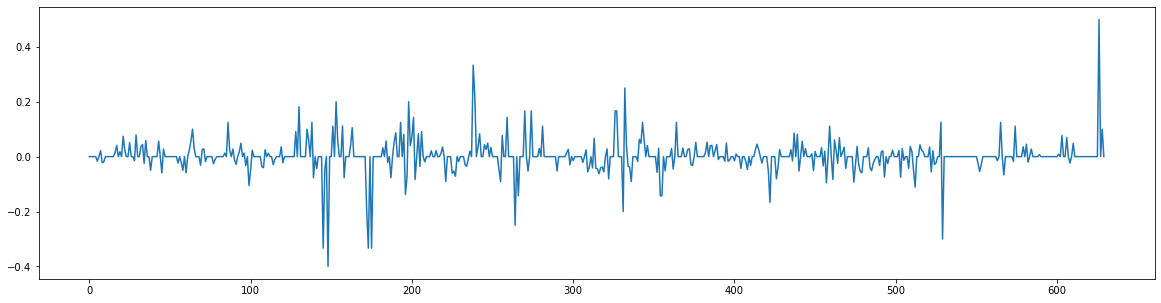

In [25]:
## Use this block to show a timeseries of raw scores

sentiment_scores = numpy.array([p["score"] for p in paragraphs])

pyplot.figure(figsize=(20, 5))
pyplot.plot(sentiment_scores)
pyplot.show()

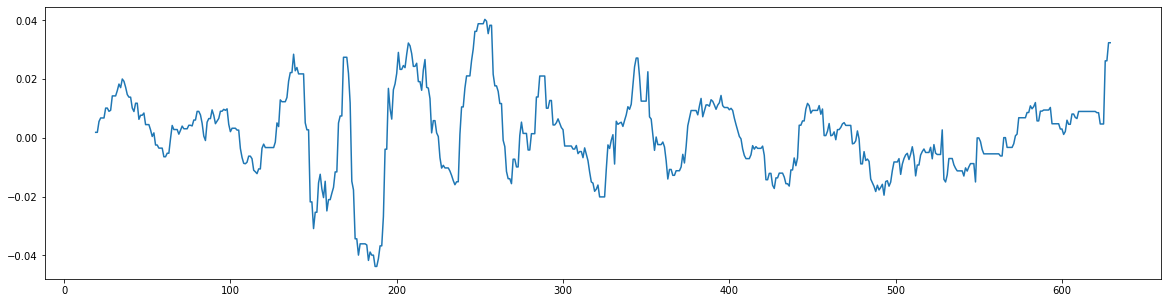

In [26]:
rolling_mean = pandas.Series(sentiment_scores).rolling(20).mean()

pyplot.figure(figsize=(20, 5))
pyplot.plot(rolling_mean)
pyplot.show()

In [27]:
## Use this block to look at specific paragraphs

for p in paragraphs[0:500]:
    print(f"{p['score']:.2f}\t{p['text']}")

0.00	The
0.00	House
0.00	on
0.00	Mango Street
0.00	We didn’t always live on Mango Street. Before that we lived on Loomis on the third floor, and before that we lived on Keeler. Before Keeler it was Paulina, and before that I can’t remember. But what I remember most is moving a lot. Each time it seemed there’d be one more of us. By the time we got to Mango Street we were six—Mama, Papa, Carlos, Kiki, my sister Nenny and me.
-0.02	The house on Mango Street is ours, and we don’t have to pay rent to anybody, or share the yard with the people downstairs, or be careful not to make too much noise, and there isn’t a landlord banging on the ceiling with a broom. But even so, it’s not the house we’d thought we’d get.
0.00	We had to leave the flat on Loomis quick. The water pipes broke and the landlord wouldn’t fix them because the house was too old. We had to leave fast. We were using the washroom next door and carrying water over in empty milk gallons. That’s why Mama and Papa looked for a hous